# Chapter 6: Transfer Learning and Pretrained Models

## 6.4 Torch Hub

### 6.4.1 Listing Models

In [1]:
import torch
repo = 'pytorch/vision:v0.15.2'
entrypoints = torch.hub.list(repo)
entrypoints

Downloading: "https://github.com/pytorch/vision/zipball/main" to /root/.cache/torch/hub/main.zip
/root/.cache/torch/hub/pytorch_vision_main/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: ''If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fcn_resnet101',
 'fcn_resnet50',
 'get_model_weights',
 'get_weight',
 'googlenet',
 'inception_v3',
 'lraspp_mobilenet_v3_large',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'r2plus1d_18',
 'r3d_18',
 'raft_large',
 'raft_small',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 'regnet_x_32gf',
 'regnet_x_3_2gf',
 'regnet_x_400mf',
 'regnet_x_800mf',
 'regnet_x_8gf',
 'regnet_y_128gf',
 'regnet_y_16gf',
 'regnet_y_1

### 6.4.2 Loading a Model

In [2]:
resnet_help = torch.hub.help(repo, 'resnet50')
print(resnet_help)

ResNet-50 from `Deep Residual Learning for Image Recognition <https://arxiv.org/abs/1512.03385>`__.

    .. note::
       The bottleneck of TorchVision places the stride for downsampling to the second 3x3
       convolution while the original paper places it to the first 1x1 convolution.
       This variant improves the accuracy and is known as `ResNet V1.5
       <https://ngc.nvidia.com/catalog/model-scripts/nvidia:resnet_50_v1_5_for_pytorch>`_.

    Args:
        weights (:class:`~torchvision.models.ResNet50_Weights`, optional): The
            pretrained weights to use. See
            :class:`~torchvision.models.ResNet50_Weights` below for
            more details, and possible values. By default, no pre-trained
            weights are used.
        progress (bool, optional): If True, displays a progress bar of the
            download to stderr. Default is True.
        **kwargs: parameters passed to the ``torchvision.models.resnet.ResNet``
            base class. Please refer to 

Using cache found in /root/.cache/torch/hub/pytorch_vision_main


In [3]:
untrained_model = torch.hub.load(repo, 'resnet50')
untrained_model

Using cache found in /root/.cache/torch/hub/pytorch_vision_main


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### 6.4.3 Loading Pretrained Weights

In [4]:
model = torch.hub.load(repo, 'resnet50', weights='ResNet50_Weights.DEFAULT')

Using cache found in /root/.cache/torch/hub/pytorch_vision_main
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 160MB/s]


In [5]:
torch.hub.get_dir()

'/root/.cache/torch/hub'

## 6.5 Computer Vision

### 6.5.2 Model

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step1.png)

In [6]:
model = torch.hub.load(repo, 'resnet50', weights='ResNet50_Weights.DEFAULT')

Using cache found in /root/.cache/torch/hub/pytorch_vision_main


In [7]:
from torchvision.models import get_weight

weights = get_weight('ResNet50_Weights.DEFAULT')
model = torch.hub.load(repo, 'resnet50', weights=weights)

Using cache found in /root/.cache/torch/hub/pytorch_vision_main


In [8]:
weights.meta.keys()

dict_keys(['min_size', 'categories', 'num_params', 'recipe', '_metrics', '_ops', '_file_size', '_docs'])

### 6.5.3 Weights' Metadata

In [9]:
categories = weights.meta['categories']
categories[:20]

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee']

In [10]:
weights.meta['num_params']/1e6

25.557032

In [11]:
for s in [18, 34, 50, 101, 152]:
    n_params = get_weight(f'ResNet{s}_Weights.DEFAULT').meta['num_params']/1e6
    print(f'ResNet{s}: {n_params:.2f} million')

ResNet18: 11.69 million
ResNet34: 21.80 million
ResNet50: 25.56 million
ResNet101: 44.55 million
ResNet152: 60.19 million


In [12]:
for s in [18, 34, 50, 101, 152]:
    acc1 = get_weight(f'ResNet{s}_Weights.DEFAULT').meta['_metrics']['ImageNet-1K']['acc@1']
    print(f'ResNet{s}: {acc1}')

ResNet18: 69.758
ResNet34: 73.314
ResNet50: 80.858
ResNet101: 81.886
ResNet152: 82.284


### 6.5.4 Transforms

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step3.png)

In [13]:
transforms_fn = weights.transforms()
transforms_fn

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [14]:
isinstance(transforms_fn, torch.nn.Module)

True

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch4/image_channels2.png)

<a title="Gibe, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Igel.JPG"><img width="512" alt="Igel" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Igel.JPG/512px-Igel.JPG"></a>
<center><a href="https://commons.wikimedia.org/wiki/File:Igel.JPG">Gibe</a>, <a href="http://creativecommons.org/licenses/by-sa/3.0/">CC BY-SA 3.0</a>, via Wikimedia Commons</center>

In [15]:
import numpy as np
import requests
from PIL import Image
from io import BytesIO

def get_image_from_url(url, headers=None):
    if headers is None:
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}
    response = requests.get(url, headers=headers)
    response.raise_for_status()
    img = Image.open(BytesIO(response.content))
    return img

In [16]:
url = 'https://upload.wikimedia.org/wikipedia/commons/7/72/Igel.JPG'
img = get_image_from_url(url)
img.height, img.width

(846, 1075)

In [17]:
array = np.array(img)
array.shape, array[:, :, 0]

((846, 1075, 3),
 array([[206, 206, 208, ..., 255, 255, 255],
        [197, 205, 203, ..., 255, 255, 255],
        [207, 211, 215, ..., 254, 253, 253],
        ...,
        [176, 186, 200, ...,   0,   0,   0],
        [152, 165, 179, ...,   0,   0,   0],
        [132, 136, 145, ...,   0,   0,   0]], dtype=uint8))

In [18]:
preproc_img = transforms_fn(img)
preproc_img.shape, preproc_img[0, :, :]

(torch.Size([3, 224, 224]),
 tensor([[-0.0116, -0.0458, -0.1657,  ...,  2.2318,  2.2489,  2.2318],
         [-0.0972, -0.1828, -0.1486,  ...,  2.1804,  2.1633,  1.8722],
         [-0.0629, -0.0458,  0.0056,  ...,  1.7523,  2.1290,  1.7865],
         ...,
         [ 2.1975,  2.1633,  2.0434,  ..., -0.4226, -0.7993, -1.2103],
         [ 1.8722,  2.0777,  2.1633,  ..., -1.1760, -0.9877, -0.7650],
         [-0.6965,  0.2111,  0.7591,  ..., -1.5185, -1.3815, -1.3815]]))

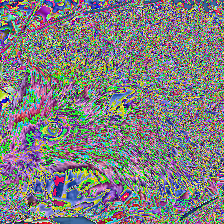

In [19]:
from torchvision.transforms import ToPILImage

ToPILImage()(preproc_img)

### 6.5.5 Inference

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step5.png)

In [20]:
mini_batch = preproc_img.unsqueeze(0)
mini_batch.shape

torch.Size([1, 3, 224, 224])

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch4/logits.png)
    
   
![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch4/logits_probs.png)

In [21]:
logits = model(preproc_img.unsqueeze(0))
highest_logit = logits.argmax(axis=1)

highest_logit, categories[highest_logit]

(tensor([185]), 'Norfolk terrier')

In [22]:
model.eval()
logits = model(preproc_img.unsqueeze(0))
highest_logit = logits.argmax(axis=1)

highest_logit, categories[highest_logit]

(tensor([334]), 'porcupine')

#### 6.5.5.1 Probabilities

In [23]:
import torch.nn.functional as F
probabilities = F.softmax(logits, dim=-1)
probabilities.shape, probabilities.sum(dim=-1)

(torch.Size([1, 1000]), tensor([1.0000], grad_fn=<SumBackward1>))

In [24]:
values, indices = torch.topk(probabilities, k=1)
values, indices

(tensor([[0.3559]], grad_fn=<TopkBackward0>), tensor([[334]]))

In [25]:
categories[indices[0]]

'porcupine'

## 6.6 Dropout
    
![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step1.png)

In [26]:
import torch.nn as nn

dropping_model = nn.Sequential(nn.Dropout(p=0.5))

In [27]:
random_input = torch.randn(10)
random_input

tensor([-2.5264,  0.6232, -0.1237,  0.8670, -1.5351, -0.3728, -0.2706,  0.0397,
        -0.3718,  1.0280])

In [28]:
dropping_model.train()
output_train = dropping_model(random_input)
output_train

tensor([-5.0528,  1.2464, -0.0000,  0.0000, -0.0000, -0.7456, -0.5413,  0.0000,
        -0.0000,  2.0559])

In [29]:
dropping_model.eval()
output_eval = dropping_model(random_input)
output_eval

tensor([-2.5264,  0.6232, -0.1237,  0.8670, -1.5351, -0.3728, -0.2706,  0.0397,
        -0.3718,  1.0280])

### 6.7 ImageFolder Dataset
    
![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step4.png)

### 6.7.2 Downloading and Saving Images

In [30]:
import os
import requests
from io import BytesIO
from PIL import Image

def save_images(folder, search_term, count=10):
    if not os.path.exists(folder):
        os.mkdir(folder)

    SEARCH_URL = "https://huggingface.co/api/experimental/images/search"

    params = {"q": search_term, "license": "public", "imageType": "photo", "count": count}

    resp = requests.get(SEARCH_URL, params=params)
    if resp.status_code == 200:
        content = resp.json()['value']
        urls = [img['thumbnailUrl'] for img in content]

        folder = os.path.join(folder, search_term)
        if not os.path.exists(folder):
            os.mkdir(folder)

        i = 0
        for url in urls:
            try:
                img = get_image_from_url(url)
                fname = os.path.join(folder, f'{i}.jpg')
                img.save(fname)
                i += 1
            except Exception:
                pass
        print(f'Retrieved {i} images for {search_term}')
    else:
        print(f'Failed to retrieve URLs for {search_term}')

In [31]:
targets = ['hedgehog', 'ostrich', 'armadillo']

for term in targets:
    save_images('./animals', term)

Retrieved 10 images for hedgehog
Retrieved 10 images for ostrich
Retrieved 10 images for armadillo


In [32]:
!ls -l ./animals

total 12
drwxr-xr-x 2 root root 4096 Jul 20 19:10 armadillo
drwxr-xr-x 2 root root 4096 Jul 20 19:10 hedgehog
drwxr-xr-x 2 root root 4096 Jul 20 19:10 ostrich


In [33]:
!ls -l ./animals/armadillo

total 480
-rw-r--r-- 1 root root 38291 Jul 20 19:10 0.jpg
-rw-r--r-- 1 root root  7458 Jul 20 19:10 1.jpg
-rw-r--r-- 1 root root 41981 Jul 20 19:10 2.jpg
-rw-r--r-- 1 root root 41132 Jul 20 19:10 3.jpg
-rw-r--r-- 1 root root 51142 Jul 20 19:10 4.jpg
-rw-r--r-- 1 root root 59301 Jul 20 19:10 5.jpg
-rw-r--r-- 1 root root 41383 Jul 20 19:10 6.jpg
-rw-r--r-- 1 root root 73822 Jul 20 19:10 7.jpg
-rw-r--r-- 1 root root 58300 Jul 20 19:10 8.jpg
-rw-r--r-- 1 root root 51982 Jul 20 19:10 9.jpg


In [34]:
from torchvision.datasets import ImageFolder
from torchvision.models import get_weight

weights = get_weight('ResNet50_Weights.DEFAULT')
transforms_fn = weights.transforms()

dataset = ImageFolder('./animals', transform=transforms_fn)
targets = dataset.classes

In [35]:
dataset, targets

(Dataset ImageFolder
     Number of datapoints: 30
     Root location: ./animals
     StandardTransform
 Transform: ImageClassification(
                crop_size=[224]
                resize_size=[232]
                mean=[0.485, 0.456, 0.406]
                std=[0.229, 0.224, 0.225]
                interpolation=InterpolationMode.BILINEAR
            ),
 ['armadillo', 'hedgehog', 'ostrich'])

In [36]:
x, y = dataset[0]
targets[y], x

('armadillo',
 tensor([[[ 0.0227, -0.0287, -0.0972,  ..., -0.8335, -0.9020, -0.9192],
          [-0.0116, -0.0629, -0.1314,  ..., -0.7822, -0.8507, -0.8849],
          [ 0.0227, -0.0801, -0.1828,  ..., -0.6623, -0.7137, -0.7993],
          ...,
          [ 0.2282,  0.2282,  0.3652,  ..., -0.8849, -0.5253, -0.5424],
          [ 0.5193,  0.6049,  0.6392,  ..., -0.3712, -0.3712, -0.4397],
          [ 0.5193,  0.7933,  0.8447,  ...,  0.0056, -0.1314, -0.1999]],
 
         [[-0.2150, -0.2675, -0.3375,  ..., -0.9153, -0.9678, -0.9853],
          [-0.2500, -0.3025, -0.3725,  ..., -0.8627, -0.9153, -0.9503],
          [-0.2150, -0.3200, -0.4251,  ..., -0.7402, -0.7752, -0.8627],
          ...,
          [-0.0749, -0.1275, -0.0399,  ..., -0.8627, -0.5301, -0.5476],
          [ 0.1176,  0.1527,  0.1352,  ..., -0.5126, -0.5301, -0.5826],
          [ 0.0301,  0.2752,  0.2927,  ..., -0.2675, -0.3725, -0.4426]],
 
         [[-0.2881, -0.3404, -0.4101,  ..., -0.8981, -0.9156, -0.9330],
          [-0.

In [37]:
model.eval()
mini_batch = x.unsqueeze(0)

logits = model(mini_batch)
pred_idx = logits.argmax(dim=1)

categories[pred_idx]

'armadillo'